In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import probplot
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [152]:
df_train = pd.read_csv('train.csv')

In [153]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
df_test = pd.read_csv('test.csv')

In [155]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<li>Training set has 891 rows and  12 columns, test set has 418 rows and 11 columns</li>
<li>Extra column in training set is Survived feature, which is the target variable</li>

In [156]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [157]:
# Add an identifier column to distinguish between train and test
df_train['is_train'] = 1
df_test['is_train'] = 0

###### Concatenating train and test data can be a helpful approach to gain a comprehensive understanding of the entire dataset

In [158]:
combined_df = pd.concat([df_train, df_test], ignore_index=True)

In [159]:
combined_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


#####  Distribution of numerical feature

In [160]:
combined_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


**Observation**
<li>More than 75% did not travel with parents or children.
<li>Less passengers were traveling with either siblings/spouse.
<li>Fares varied significantly with less than 1% passengers paying as high as 512.
<li>Mean Age of passengers is 29 and max is 80.

##### Distribution of categorical features

In [161]:
combined_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


**Observation**
<li>Names are unique across the dataset.
<li>Sex variable as two possible values with male appears more frequently compared to the female.(freq=833).
<li>Embarked has three values(C = Cherbourg, Q = Queenstown, S = Southampton). S port used by most passengers (top=S)
<li>Ticket 929 unique values

In [162]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_train     1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


**Observation**
<li>In this data ['Age', 'Cabin', 'Embarked', 'Fare'] has missing values</li>
<li>No of missing values in Age = 263</li>
<li>No of missing values in Cabin = 744</li>
<li>No of missing values in Embarked = 2</li>
<li>No of missing values in Fare = 1

#### Categorizing columns

In [163]:
combined_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_train'],
      dtype='object')

<li>Categorical Columns = Survived, Sex, Embarked, SibSp, Parch, Pclass.
<li>Continous Columns = Age, Fare. 

In [164]:
missing_age = combined_df['Age'].isnull()
missing_cabin = combined_df['Cabin'].isnull()
pclass_3 = combined_df['Pclass'] == 3
# Create a boolean mask where both Age and Cabin values are missing and passengers are in Pclass 3
missing_value = missing_age & missing_cabin & pclass_3
df_missing_value = combined_df[missing_value]
df_missing_value.shape[0]

205

**Observation**
<li>There were missing values in both Age and Cabin so I checking if there are any passengers were both Age and Cabin details were missing and there were (240) rows were both the details were missing
<li>I aslo check this with other features and most of the passengers with missing "Age" and "Cabin" details were 'male'
<li>Most of these passengers boarded from S(Southampton).
<li> There were (188) passengers with missing values for both "Age" and "Cabin" among those traveling with 0 siblings/spouses ('SibSp') and (213) passengers with missing values for both "Age" and "Cabin" among those traveling with 0 parents/children ('Parch').
<li>Significant portion of passengers traveling in Pclass 3 have missing values (205) for both "Age" and "Cabin" details

# 1. Exploratory Data Analysis

## 1.2 Univariate analysis

In [165]:
def calculate_percentage(df, column_name):
    percentage = df[column_name].value_counts() / df[column_name].shape[0] * 100
    return percentage

survived_percentage = calculate_percentage(combined_df, 'Survived')
pclass_percentage = calculate_percentage(combined_df, 'Pclass')
sex_percentage = calculate_percentage(combined_df, 'Sex')
embarked_percentage = calculate_percentage(combined_df, 'Embarked')

print("Survived Percentage:")
print(survived_percentage)
print("\nPclass Percentage:")
print(pclass_percentage)
print("\nSex Percentage:")
print(sex_percentage)
print("\nEmbarked Percentage:")
print(embarked_percentage)

Survived Percentage:
Survived
0.0    41.940413
1.0    26.126814
Name: count, dtype: float64

Pclass Percentage:
Pclass
3    54.163484
1    24.675325
2    21.161192
Name: count, dtype: float64

Sex Percentage:
Sex
male      64.400306
female    35.599694
Name: count, dtype: float64

Embarked Percentage:
Embarked
S    69.824293
C    20.626432
Q     9.396486
Name: count, dtype: float64


<Axes: xlabel='Fare', ylabel='Count'>

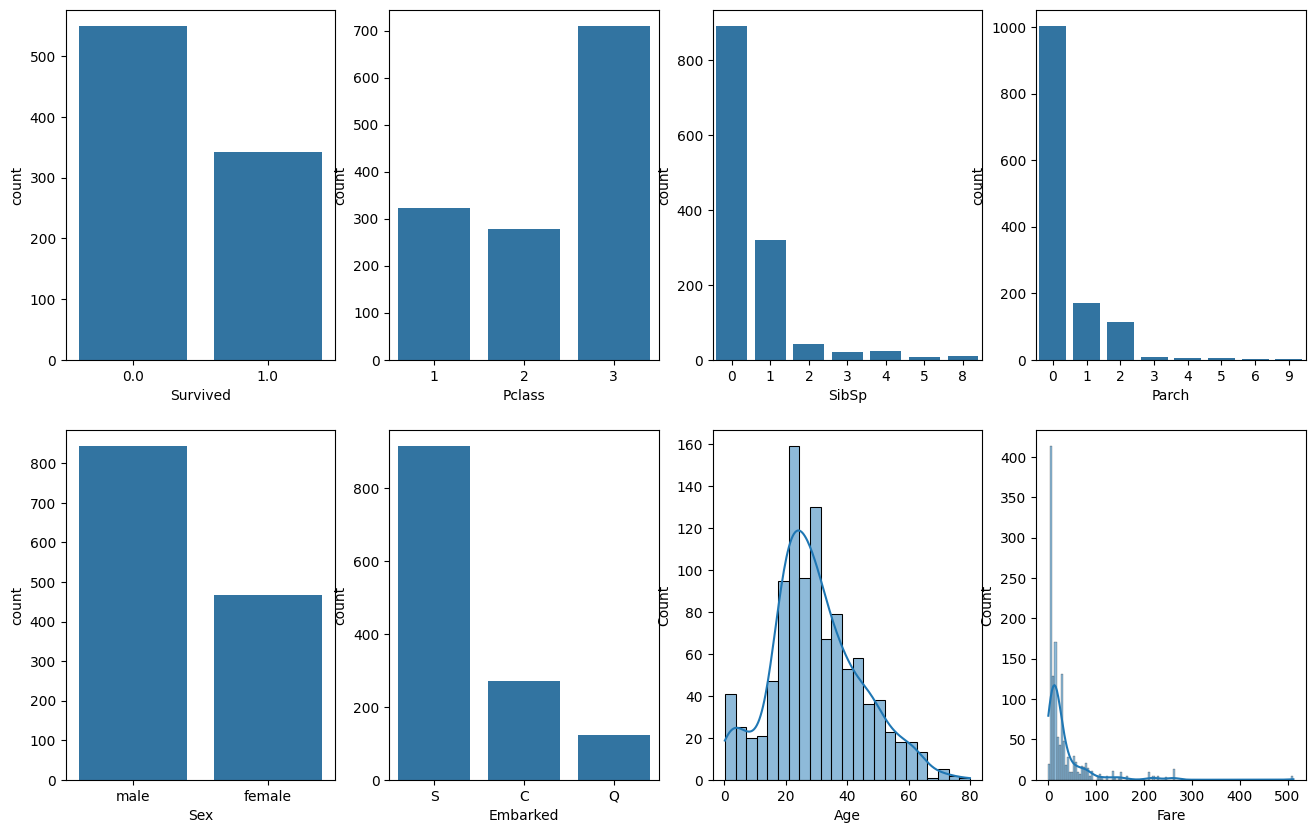

In [166]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x="Survived", data=combined_df, ax=axes[0, 0])
sns.countplot(x="Pclass", data=combined_df, ax=axes[0, 1])
sns.countplot(x="SibSp", data=combined_df, ax=axes[0, 2])
sns.countplot(x="Parch", data=combined_df, ax=axes[0, 3])
sns.countplot(x="Sex", data=combined_df, ax=axes[1, 0])
sns.countplot(x="Embarked", data=combined_df, ax=axes[1, 1])
sns.histplot(combined_df['Age'],kde=True,ax=axes[1,2])
sns.histplot(combined_df['Fare'], kde=True,ax=axes[1,3])

**Observation**
<li>Only 26% People survived
<li>41% did not survived
<li>Majority of the passengers (54%) traveling in Pclass3, then passengers travelling in Pclass1 (24%) and Pclass2 (21%)
<li>Male passengers(64%) were more than female passengers(35%).
<li>Most of the passengers were traveling alone
<li>Average fare price is 33
<li>Average age is 29 and the graph is right skewed
<li>Fare is very skewed

## 1.3 Bivariate analysis
### 1.3.1Categorical and Categorical

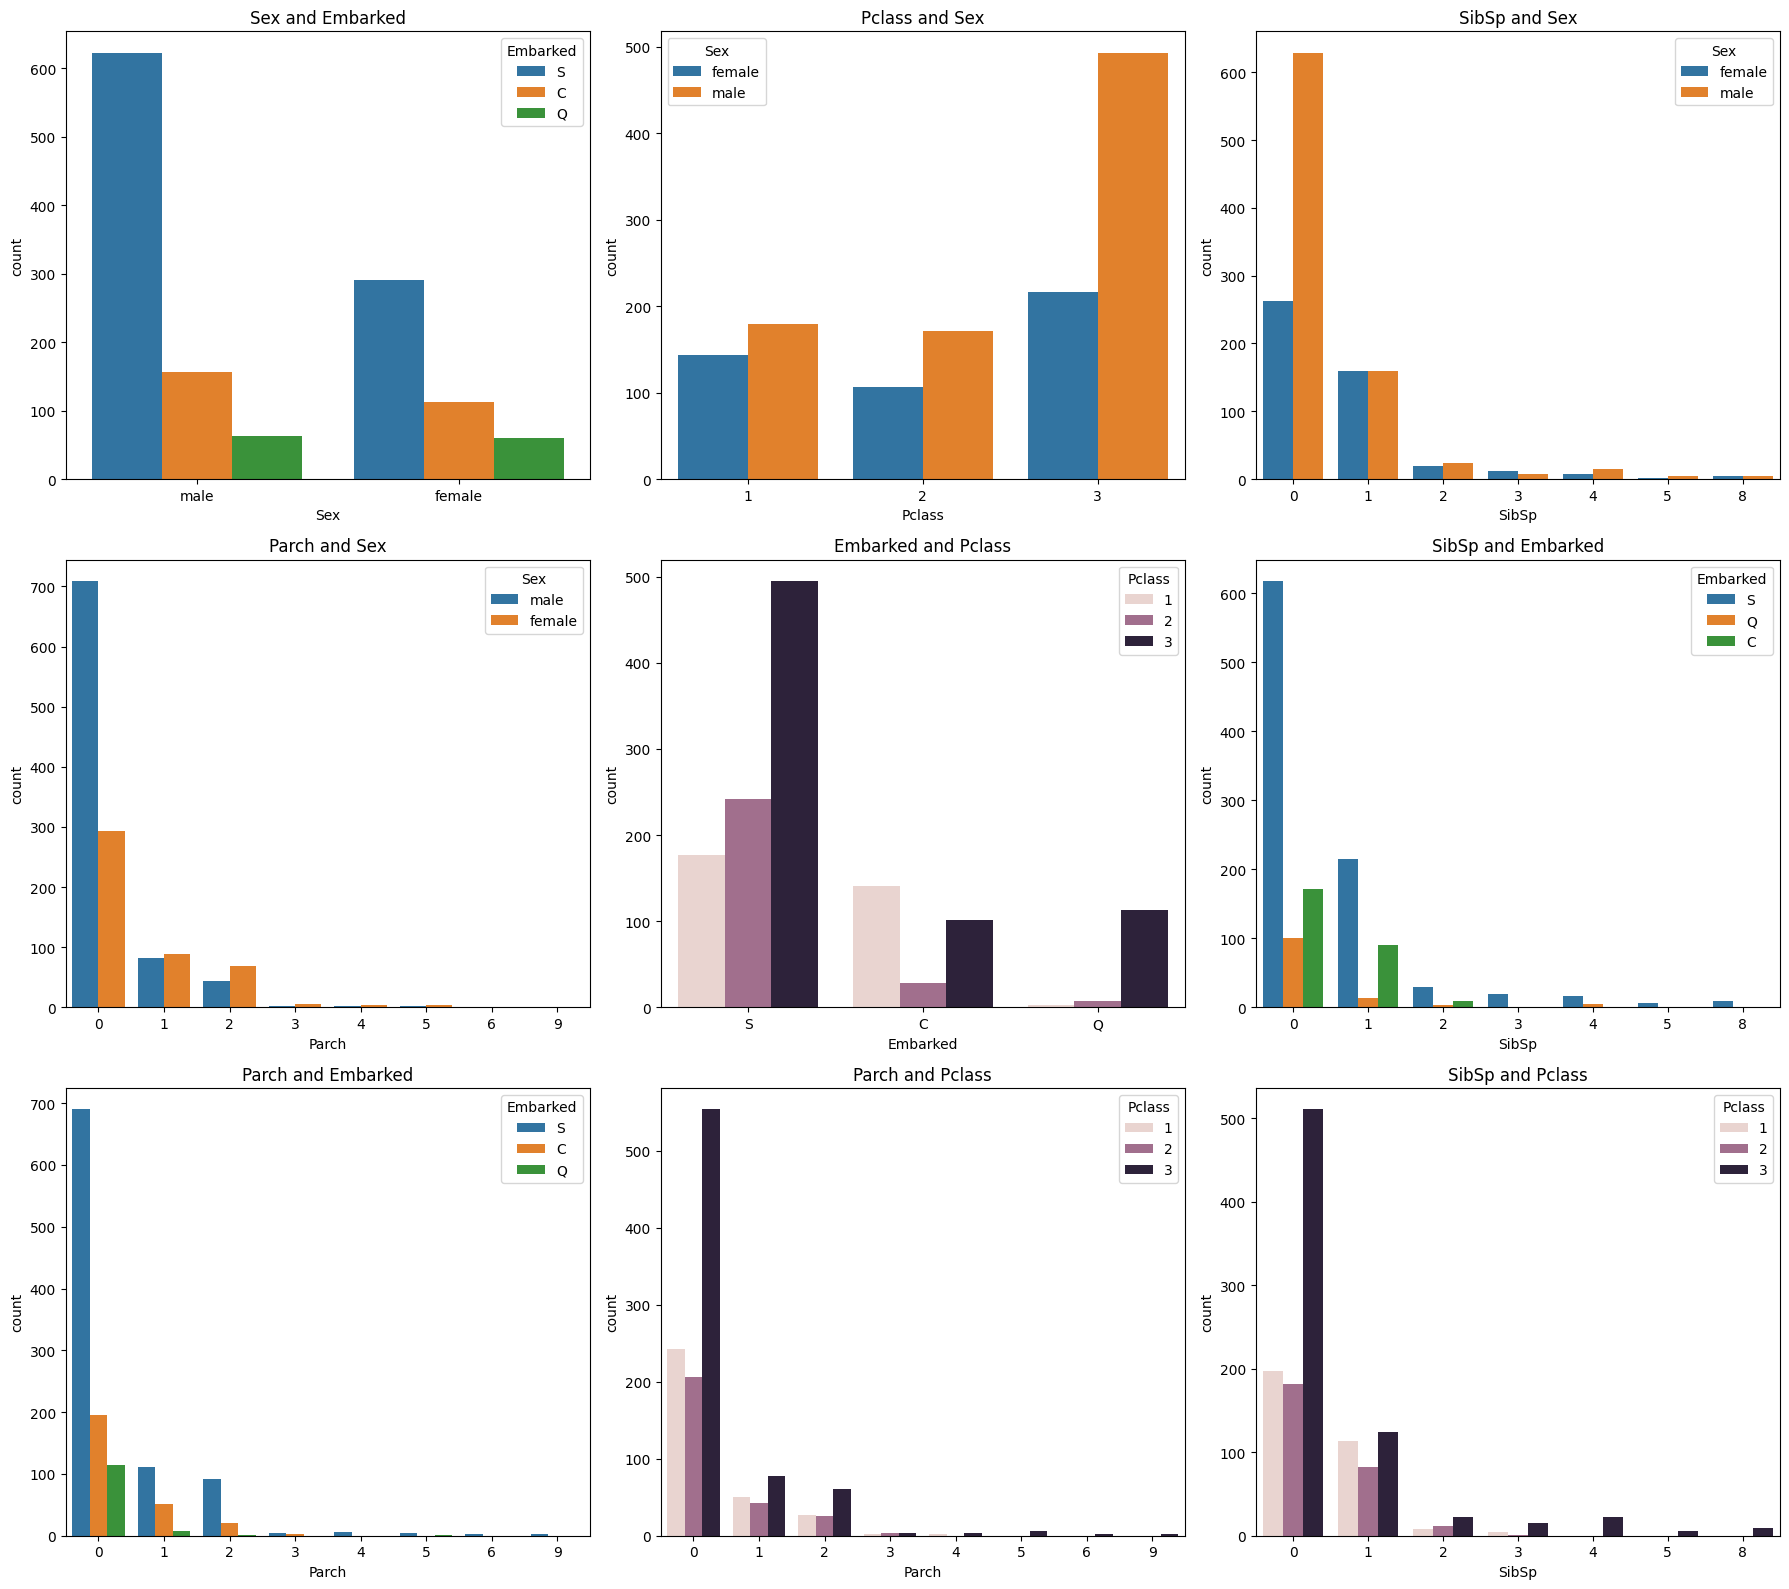

In [167]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))

sns.countplot(x='Sex', hue='Embarked', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('Sex and Embarked')
sns.countplot(x='Pclass', hue='Sex', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('Pclass and Sex')
sns.countplot(x='SibSp', hue='Sex', data=combined_df, ax=axes[0, 2])
axes[0, 2].set_title('SibSp and Sex')
sns.countplot(x='Parch', hue='Sex', data=combined_df, ax=axes[1, 0])
axes[1, 0].set_title('Parch and Sex')
sns.countplot(x='Embarked', hue='Pclass', data=combined_df, ax=axes[1, 1])
axes[1, 1].set_title('Embarked and Pclass')
sns.countplot(x='SibSp', hue='Embarked', data=combined_df, ax=axes[1, 2])
axes[1, 2].set_title('SibSp and Embarked')
sns.countplot(x='Parch', hue='Embarked', data=combined_df, ax=axes[2, 0])
axes[2, 0].set_title('Parch and Embarked')
sns.countplot(x='Parch', hue='Pclass', data=combined_df, ax=axes[2, 1])
axes[2, 1].set_title('Parch and Pclass')
sns.countplot(x='SibSp', hue='Pclass', data=combined_df, ax=axes[2, 2])
axes[2, 2].set_title('SibSp and Pclass')

# Remove the last subplot
plt.tight_layout()

**Observation**
<li>No of males passengers that boarded from S,Q,C port were more than female passengers
<li>A large number of passengers boarded from Southampton (S), with the majority of these passengers traveling in Pclass 3
<li>Majority of the Passengers were travelling alone, most of them were male passengers and they were in Pclass 3 and boarded from S  

### 1.3.2 Categorical vs Continous

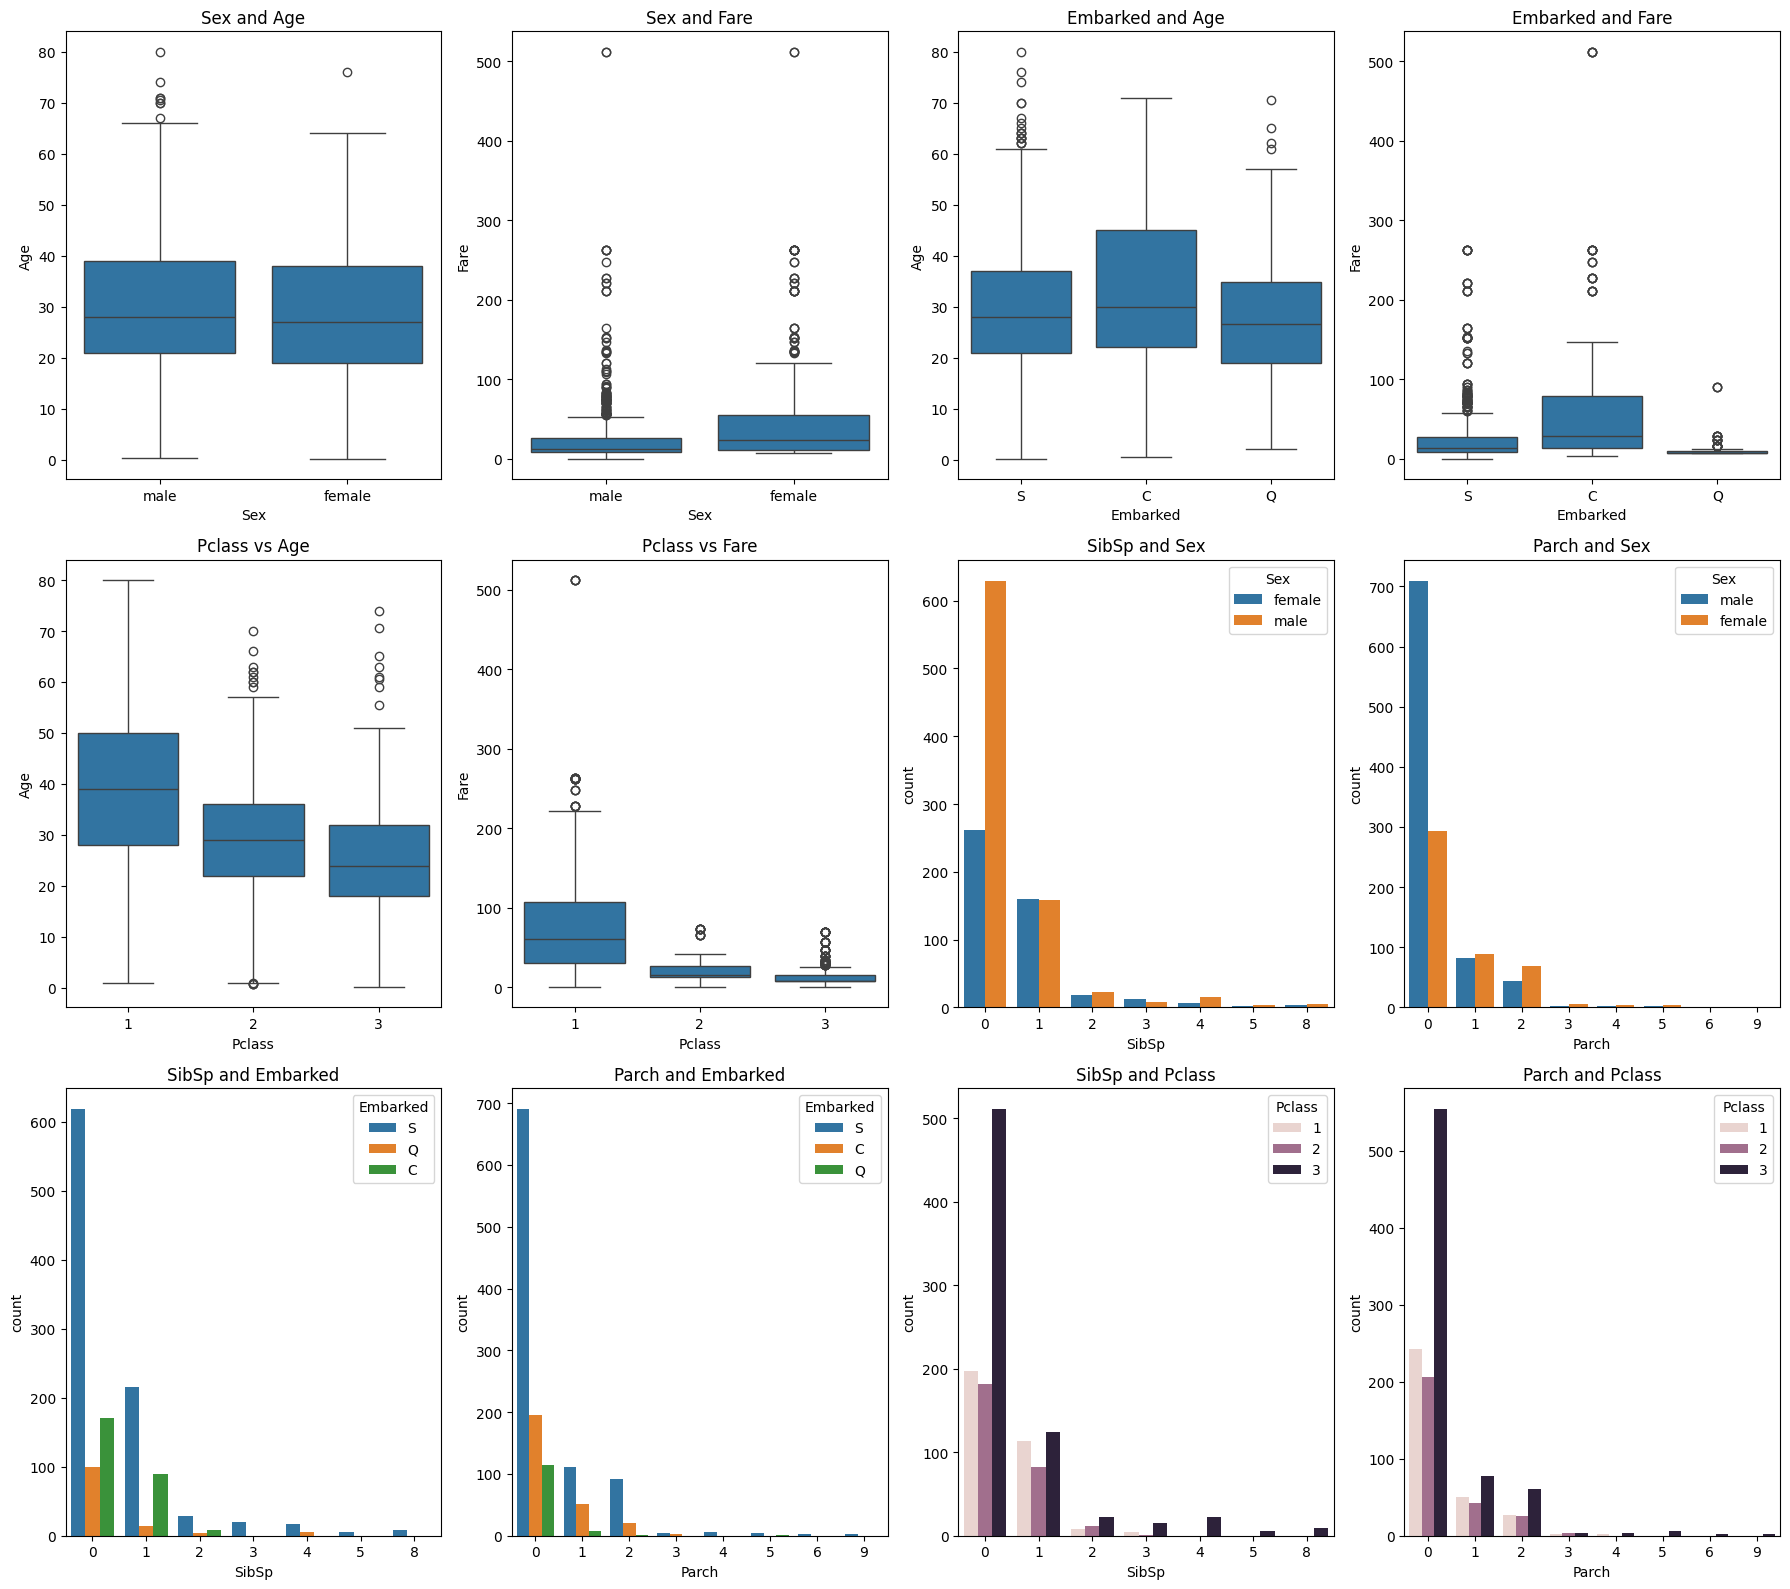

In [168]:
fig, axes = plt.subplots(3, 4, figsize=(18, 16))

sns.boxplot(x='Sex', y='Age', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('Sex and Age')

sns.boxplot(x='Sex', y='Fare', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('Sex and Fare')

sns.boxplot(x='Embarked', y='Age', data=combined_df, ax=axes[0, 2])
axes[0, 2].set_title('Embarked and Age')

sns.boxplot(x='Embarked', y='Fare', data=combined_df, ax=axes[0, 3])
axes[0, 3].set_title('Embarked and Fare')

sns.boxplot(x=combined_df['Pclass'], y=combined_df['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Pclass vs Age')

sns.boxplot(x=combined_df['Pclass'], y=combined_df['Fare'], ax=axes[1, 1])
axes[1, 1].set_title('Pclass vs Fare')

sns.countplot(x='SibSp', hue='Sex', data=combined_df, ax=axes[1, 2])
axes[1, 2].set_title('SibSp and Sex')

sns.countplot(x='Parch', hue='Sex', data=combined_df, ax=axes[1, 3])
axes[1, 3].set_title('Parch and Sex')

sns.countplot(x='SibSp', hue='Embarked', data=combined_df, ax=axes[2, 0])
axes[2, 0].set_title('SibSp and Embarked')

sns.countplot(x='Parch', hue='Embarked', data=combined_df, ax=axes[2, 1])
axes[2, 1].set_title('Parch and Embarked')

sns.countplot(x='SibSp', hue='Pclass', data=combined_df, ax=axes[2, 2])
axes[2, 2].set_title('SibSp and Pclass')

sns.countplot(x='Parch', hue='Pclass', data=combined_df, ax=axes[2, 3])
axes[2, 3].set_title('Parch and Pclass')

plt.tight_layout()
plt.show()

**Observation**
<li>The average age of male passengers was (29), slightly higher than the average age of female passengers, which was (27). Additionally, there ar few outliers with age less than zero(may be indicating newborn babies).
<li>On average, female passengers paid more for their fare (44) compared to male passengers (25). Additionally, a majority of male passengers paid fares more. Conversely, there were few female passengers who higher Fare then male passengers and there are few people who didnt pay any Fare, and there was two passengers eho paid more than (500).
<li>The average age of passengers boarding from Southampton (S) was 29, from Cherbourg (C) was 30, and from Queenstown (Q) was 26.
<li>Passengers boarding from Cherbourg (C) paid the highest average fare (59). Additionally, there are a few outliers who paid more than average passenger. This is followed by passengers from Southampton (S) with an average fare of 27. Similarly, there are also a few passengers from Southampton who paid more. Lastly, passengers from Queenstown (Q) had the lowest average fare (13).
<li>The majority of passengers were traveling alone, with most of them boarding from Southampton (S)
<li>The majority of passengers traveling alone belonged to Pclass 3
<li>Passengers in Pclass 1 have the highest average age (38) compared to Pclass 2 (29) and Pclass 3 (24)
<li>Passengers in Pclass 1 also have the highest average fare (84), followed by Pclass 2 (20) and Pclass 3 (13), may be thats why majority of people were travelling in Pclass3

### 1.3.3 Continous vs Continous

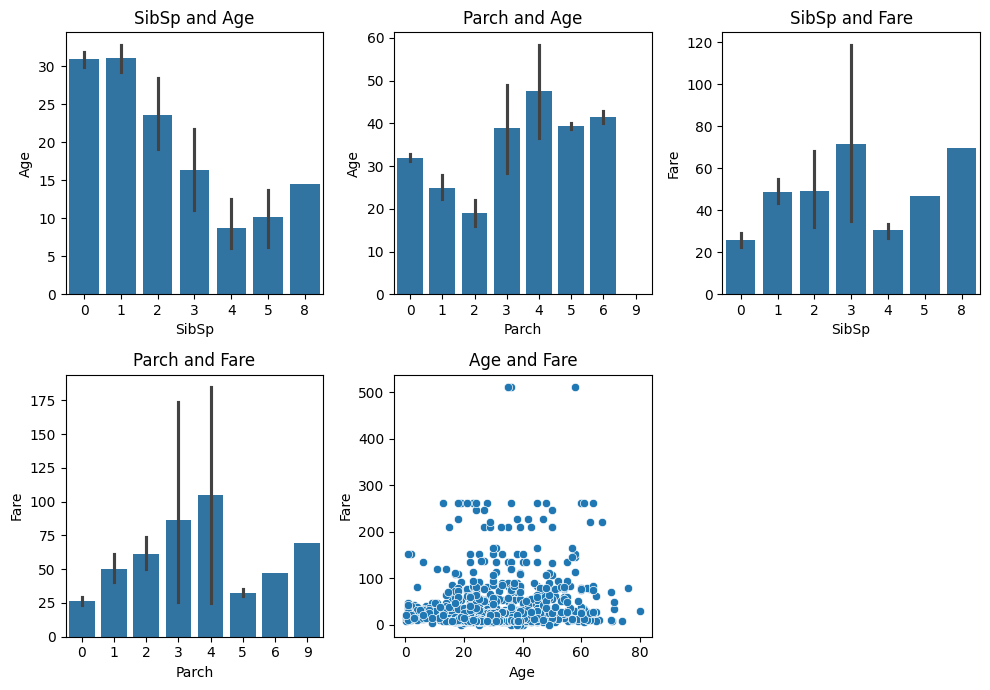

In [169]:
fig, axes = plt.subplots(2, 3, figsize = (10,7))
sns.barplot(x=combined_df['SibSp'], y=combined_df['Age'], ax = axes[0, 0])
axes[0, 0].set_title('SibSp and Age')
sns.barplot(x=combined_df['Parch'], y=combined_df['Age'], ax = axes[0, 1])
axes[0, 1].set_title('Parch and Age')
sns.barplot(x=combined_df['SibSp'], y=combined_df['Fare'], ax = axes[0, 2])
axes[0, 2].set_title('SibSp and Fare')
sns.barplot(x=combined_df['Parch'], y=combined_df['Fare'], ax = axes[1, 0])
axes[1, 0].set_title('Parch and Fare')
sns.scatterplot(x = 'Age', y = 'Fare', data = combined_df, ax = axes[1, 1])
axes[1, 1].set_title('Age and Fare')
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()

#### We want to know how well does each feature correlate with Survival

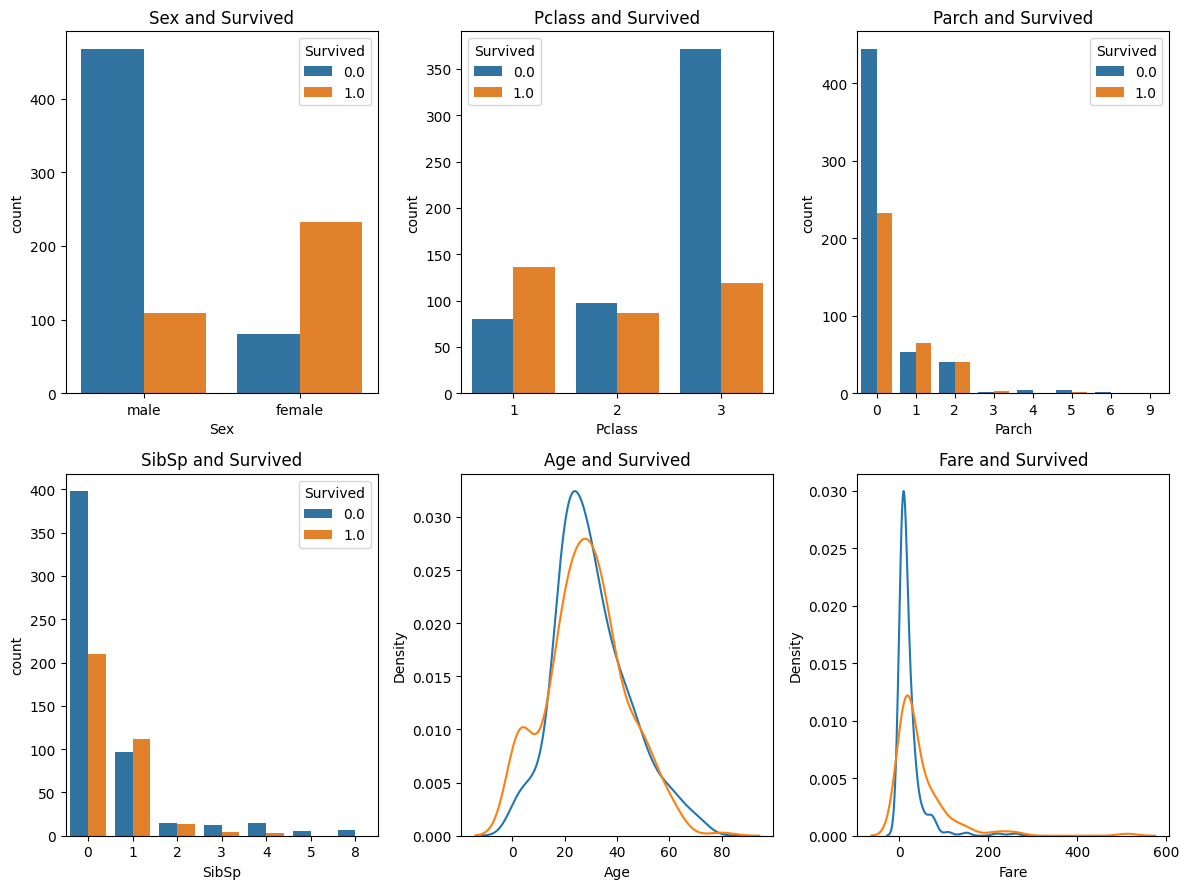

In [170]:
fig, axes = plt.subplots(2,3, figsize=(12, 9))
sns.countplot(x='Sex', hue='Survived', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('Sex and Survived')
sns.countplot(x='Pclass', hue='Survived', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('Pclass and Survived')
sns.countplot(x='Parch', hue='Survived', data=combined_df, ax=axes[0, 2])
axes[0, 2].set_title('Parch and Survived')
sns.countplot(x='SibSp', hue='Survived', data=combined_df, ax=axes[1, 0])
axes[1, 0].set_title('SibSp and Survived')
sns.kdeplot(data=combined_df[combined_df['Survived'] == 0]['Age'], ax=axes[1, 1])
sns.kdeplot(data=combined_df[combined_df['Survived'] == 1]['Age'], ax=axes[1, 1])
axes[1, 1].set_title('Age and Survived')
sns.kdeplot(data=combined_df[combined_df['Survived'] == 0]['Fare'], ax=axes[1, 2])
sns.kdeplot(data=combined_df[combined_df['Survived'] == 1]['Fare'], ax=axes[1, 2])
axes[1, 2].set_title('Fare and Survived')
plt.tight_layout()
plt.show()

**Observation**
<li>The number of male passengers were more than female passengers. Despite there being more male passengers overall, a higher proportion of female passengers survived.
<li>There is a significant correlation between belonging to Pclass=1 and survival, indicating that passengers in first class had a higher chance of surviving 
<li>Pclass 3 had higher number of passengers but a lower survival rate compared to those in the higher classes, Pclass1 and Pclass2.
<li>Despite having more casualties in Pclaass 3, passengers from both Pclass 1 and Pclass 3 had a higher number of survivors compared to Pclass 2.
<li> Children aged four and below also exhibited a high survival rate.
<li>Oldest passengers of Age = 80 survived.
<li>The majority of passengers fell within the 15-35 age range
<li>Male passengers aged between 15 and 40, as well as female passengers aged between 25 and 30, exhibited lower survival rates. Conversely, male passengers aged between 25 and 35-40, and female passengers aged between 15 and 45,as well as children demonstrated higher survival rates.
<li>Furthermore, passengers traveling with a higher number of siblings/spouses had a lower chance of survival, while single passengers (SibSp 0) had a higher chance of survival and pasengers traveling with one or two others (SibSp 1 or 2) had a slightly higher chance than other
<li>Similarly, small families, defined as having fewer parents/children onboard, showed a higher chance of survival compared to single passengers (Parch 0) or those with medium (Parch 3 or 4) and large families (Parch 5 or 6).

## 1.4 Multivarinte analysis
We are combine multiple features 

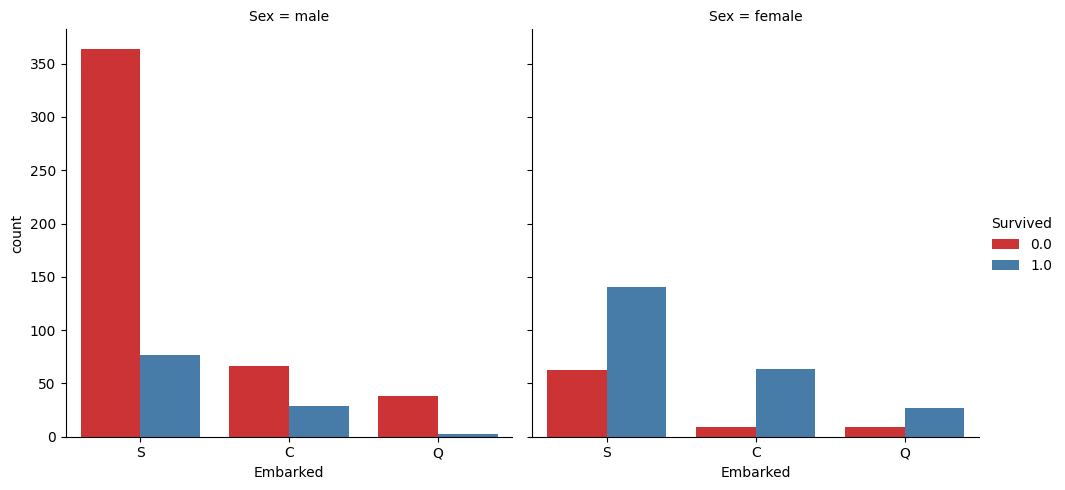

In [171]:
sns.catplot(x='Embarked', hue='Survived', col='Sex', kind='count', data=combined_df, palette='Set1')

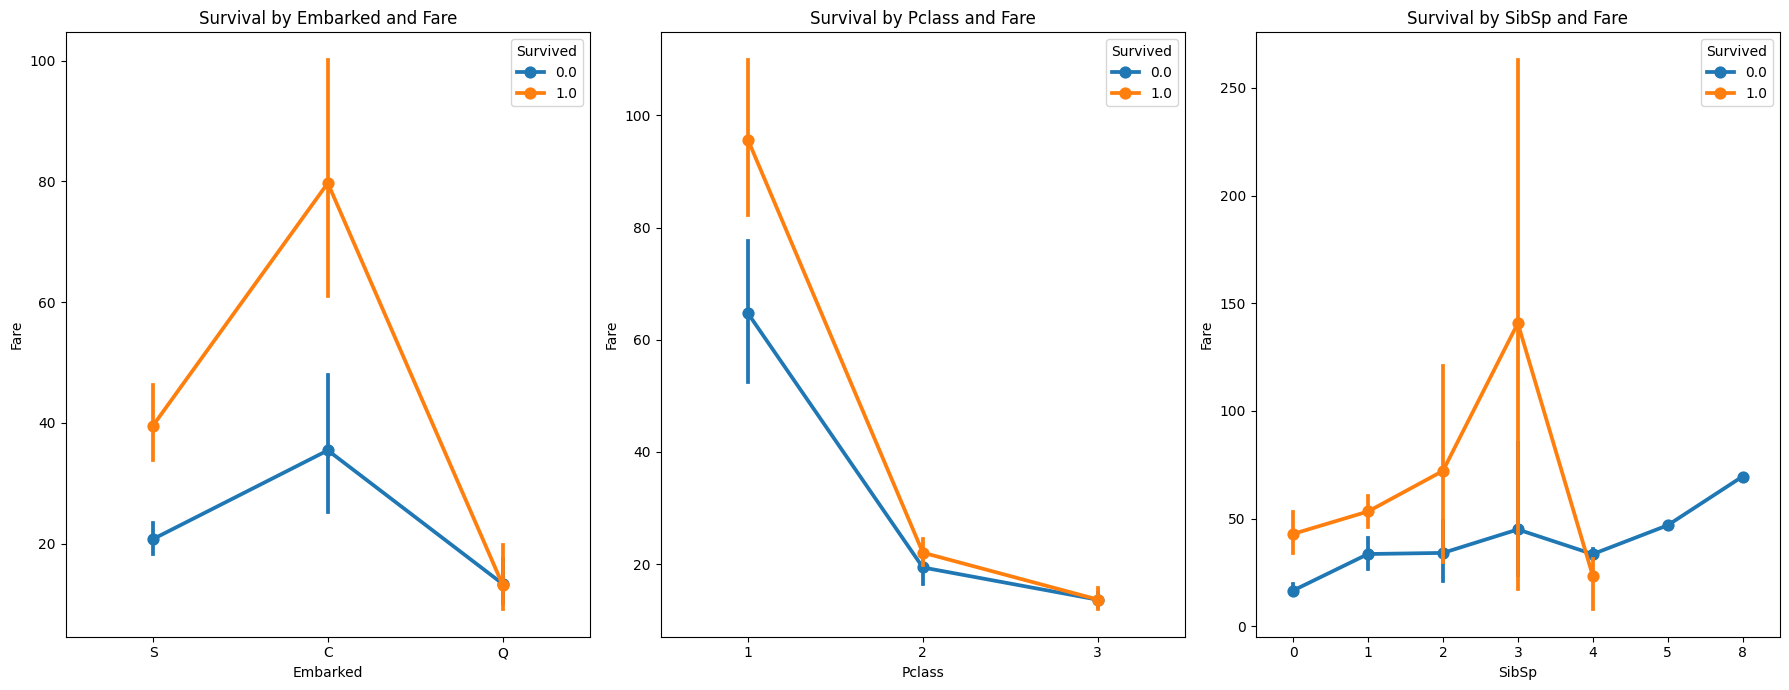

In [172]:
# Define subplot parameters
subplots_params = [
    {'x': 'Embarked', 'y':'Fare', 'xlabel': 'Embarked', 'ylabel':'Fare', 'title': 'Survival by Embarked and Fare'},
    {'x': 'Pclass', 'y':'Fare', 'xlabel': 'Pclass', 'ylabel':'Fare', 'title': 'Survival by Pclass and Fare'},
    {'x': 'SibSp', 'y':'Fare', 'xlabel': 'SibSp', 'ylabel':'Fare', 'title': 'Survival by SibSp and Fare'},
]

fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Iterate over subplots parameters and plot on each subplot
for ax, params in zip(axes.flatten(), subplots_params):
    sns.pointplot(x=params['x'], y=params['y'], hue='Survived', data=combined_df, ax=ax)
    ax.set_xlabel(params['xlabel'])
    ax.set_ylabel(params['ylabel'])
    ax.set_title(params['title'])
    
plt.tight_layout()
plt.show()

**Observation**
<li>Most of Passengers boarded from Southampton as compare to Cherbourg and Queenstown and had a higher survival rate compared to those who boarded from Cherbourg and Queenstown
<li>Higher survival rate among female passengers from Southampton compared to those from Cherbourg and Queenstown aligns with broader trends indicating that women had a higher likelihood of survival overall
<li> Negative correlation is observed between Fare and survival, indicating that passengers who paid higher fares had a higher likelihood of survival compared to those who paid lower fares

## 1.1 Correlation

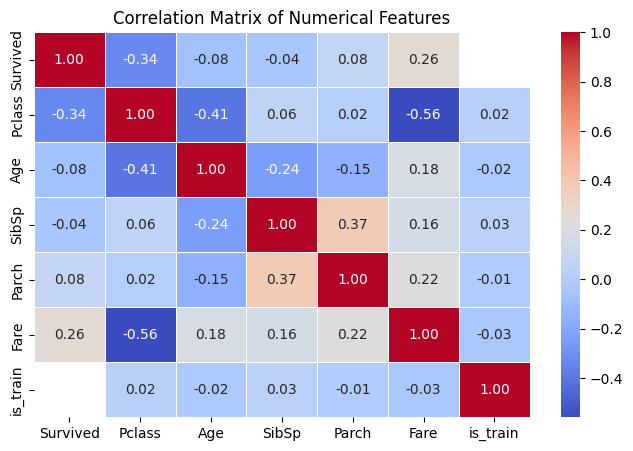

In [173]:
numerical_df = combined_df.select_dtypes(include=['int64', 'float64'])

# Drop 'PassengerId' column if present
if 'PassengerId' in numerical_df.columns:
    numerical_df.drop(['PassengerId'], axis=1, inplace=True)

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [174]:
correlation_matrix[(correlation_matrix > 0.1) | (correlation_matrix < -0.1)]

,Survived,Pclass,Age,SibSp,Parch,Fare,is_train
Survived,1.000000,-0.338481,NaN,NaN,NaN,0.257307,NaN
Pclass,-0.338481,1.000000,-0.408106,NaN,NaN,-0.558629,NaN
Age,NaN,-0.408106,1.000000,-0.243699,-0.150917,0.178740,NaN
SibSp,NaN,NaN,-0.243699,1.000000,0.373587,0.160238,NaN
Parch,NaN,NaN,-0.150917,0.373587,1.000000,0.221539,NaN
Fare,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,NaN
is_train,NaN,NaN,NaN,NaN,NaN,NaN,1.0


**Observation**
<li>There is a weak negative correlation between Pclass and Fare (-0.56) as well as between Pclass and Age (-0.41)
<li>Fare shows correlations with every other feature, indicating relationships with multiple variables
<li>Additionally, several other features exhibit weak correlations with each other, with correlation coefficients near zero.

# Data Preprocessing

### 1.1 Filling Missing Values
### 1.1.1 Embarked
There was 2 missing value in Embarked in dataset filling it with most fequent value(S)

In [175]:
combined_df["Embarked"] = combined_df["Embarked"].fillna("S")

### 1.1.2 Fare
There is 1 missing value in Fare in test dataset filling it with most fequent value

In [176]:
combined_df["Fare"]=combined_df["Fare"].fillna(combined_df['Fare'].median())

### 1.1.3 Age
There are missing values in Age in both train and test dataset and can be filled with median age, but using median age to fill missing data is not a good choice. So to fill missing values in the 'Age' column more accurately, we first check the correlation of 'Age' with other features and then use the median age values of groups defined by those features

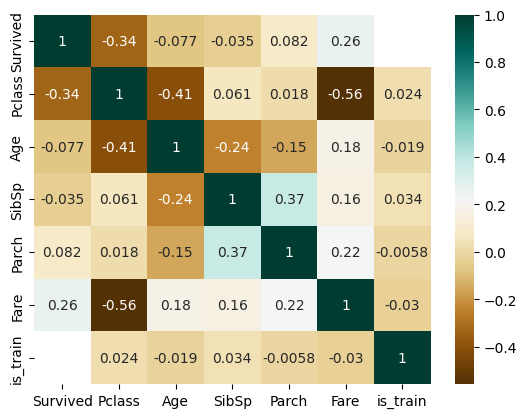

In [177]:
numeric_df = combined_df.drop(['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis=1)
g = sns.heatmap(numeric_df.corr(), cmap="BrBG", annot=True)

**Observation**
<li>There is a weak negative correlation between Pclass and Age(-0.41), Age and SibSp(-0.24)
<li>There is also waek correlation between Pclass and Parch(0.018)
<li>So we choose Pclass and SibSp gropuby them with age and find their median

In [178]:
#grouping 'Pclass', 'Parch', 'Age' and calculating their median
age_fill = combined_df.groupby(['Pclass', 'SibSp'])['Age'].median()

# Function to fill missing age values based on 'Pclass' and 'Parch'
def fill_age(row):
    if np.isnan(row['Age']):
        return age_fill[row['Pclass'], row['SibSp']]
    else:
        return row['Age']
    
# Apply the function to fill missing age values
combined_df['Age'] = combined_df.apply(fill_age, axis=1)
    
    
combined_df['Age'].mean()

29.174690603514133

## Outlier Analysis

In [179]:
symmetric_feature=[]
non_symmetric_feature=[]
for i in combined_df.describe().columns:
    if abs(combined_df[i].mean()-combined_df[i].median())<0.2:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("symmetric_features :",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("skew_symmetric_features :",non_symmetric_feature)

symmetric_features : ['PassengerId']
skew_symmetric_features : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_train']


In [180]:
skew_symmetric_features =['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'is_train']

# Apply outlier treatment to each non-symmetric feature
for feature in skew_symmetric_features:
    IQR = combined_df[feature].quantile(0.75) - combined_df[feature].quantile(0.25)
    lower_boundary = combined_df[feature].quantile(0.25) - 1.5 * IQR
    upper_boundary = combined_df[feature].quantile(0.75) + 1.5 * IQR
    
    # Replace values below the lower boundary with the lower boundary value
    combined_df.loc[combined_df[feature] < lower_boundary, feature] = lower_boundary
    
    # Replace values above the upper boundary with the upper boundary value
    combined_df.loc[combined_df[feature] > upper_boundary, feature] = upper_boundary

# 2 Feature Engineering
## 2.1 Feature Construction
### 2.1.1 Cabin
The large portion of the Cabin feature is missing, the first letter of the Cabin values are the decks in which the cabins are located. <li>Firstly, most of the values were missing so replace it with 'M'.<li>Creating a new column 'Deck' where we store the first letter of Cabin.

In [182]:
combined_df['Cabin'].fillna('M', inplace = True)

In [183]:
combined_df['Deck'] = combined_df['Cabin'].str[0]

In [184]:
combined_df['Deck'].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [185]:
pd.crosstab(combined_df['Deck'], combined_df['Survived'], normalize='index')*100

Survived,0.0,1.0
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
M,70.014556,29.985444
T,100.000000,0.000000


<Axes: xlabel='Deck', ylabel='count'>

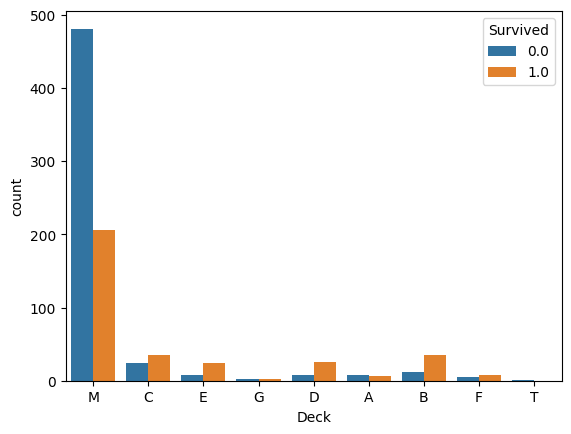

In [186]:
#pd.crosstab(combined_df['Deck'], combined_df['Survived'], normalize = 'index').plot(kind = 'bar', stacked = True)
sns.countplot(x = 'Deck', hue = 'Survived', data = combined_df)

In [187]:
pd.crosstab(combined_df['Deck'], combined_df['Pclass'], normalize='index')*100

Pclass,1.0,2.0,3.0
Deck,,,
A,100.000000,0.000000,0.000000
B,100.000000,0.000000,0.000000
C,100.000000,0.000000,0.000000
D,86.956522,13.043478,0.000000
E,82.926829,9.756098,7.317073
F,0.000000,61.904762,38.095238
G,0.000000,0.000000,100.000000
M,6.607495,25.049310,68.343195
T,100.000000,0.000000,0.000000


<Axes: xlabel='Deck'>

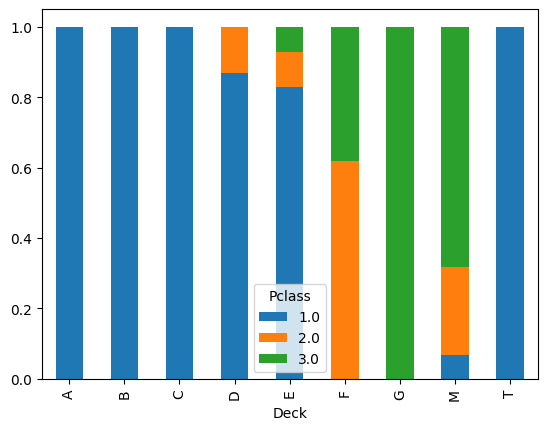

In [188]:
pd.crosstab(combined_df['Deck'], combined_df['Pclass'], normalize='index').plot(kind='bar', stacked=True)

**Observation**
<li>Cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers
<li>Deck B, C, D and E have the highest survival rates. Those decks are mostly occupied by 1st class passengers.
<li>M has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers.
<li>M (Missing Cabin values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims
<li>100% of A, B and C decks are 1st class passengers
<li>Deck D has 86% 1st class and 13% 2nd class passengers
<li>Deck E has 84% 1st class, 9% 2nd class and 7% 3rd class passengers
<li>Deck F has 61% 2nd class and 38% 3rd class passengers
<li>100% of G deck are 3rd class passengers
<li>There is one person on the boat deck in T cabin and he is a 1st class passenger.
<li>Passengers labeled as M are the missing values in Cabin feature.

In [189]:
combined_df['Deck'] = combined_df['Deck'].replace(['A', 'B', 'C', 'T'], 'ABC')
combined_df['Deck'] = combined_df['Deck'].replace(['D', 'E'], 'DE')
combined_df['Deck'] = combined_df['Deck'].replace(['F', 'G'], 'FG')
combined_df['Deck'].value_counts()

Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

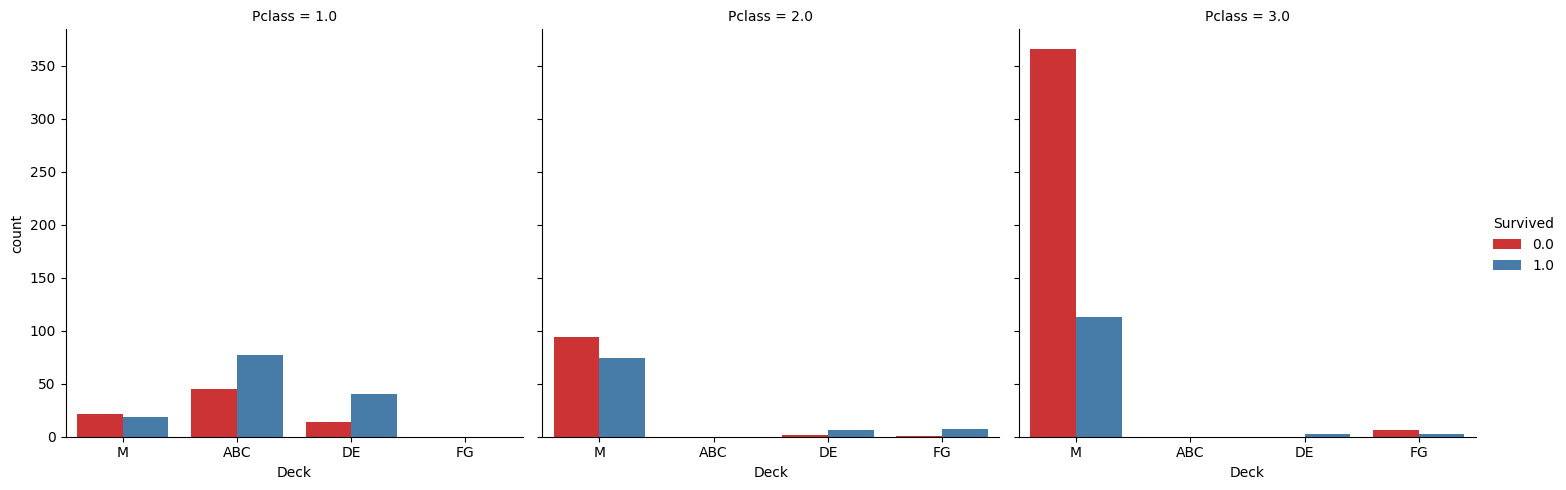

In [190]:
sns.catplot(x='Deck', hue='Survived', col='Pclass', kind='count', data=combined_df, palette='Set1')

**Observation**
<li>A, B and C decks are labeled as ABC because all of them have only 1st class passengers
<li>D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
<li>F and G decks are labeled as FG because of the same reason above
<li>M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

### 2.2.2 Name

In [191]:
combined_df['Title'] = combined_df['Name'].str.split(',').str.get(1).str.strip().str.split('.').str.get(0)

In [192]:
combined_df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [193]:
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare')
combined_df['Title'] = combined_df['Title'].replace(['Dona','Mrs', 'Ms', 'Mlle', 'Lady', 'Mme'], 'Mrs')

In [194]:
combined_df['Title'].value_counts()

Title
Mr        757
Miss      260
Mrs       203
Master     61
Rare       28
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

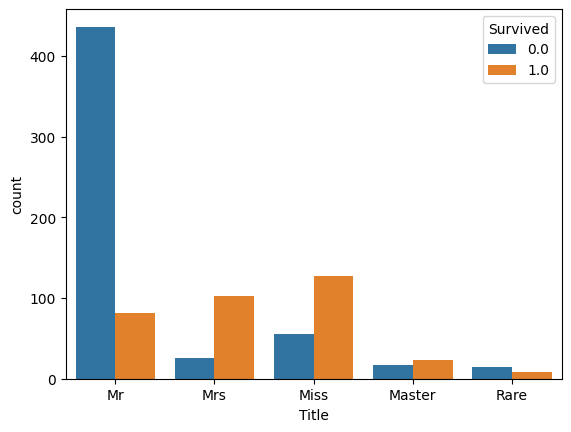

In [195]:
sns.countplot(x = 'Title', hue = 'Survived', data = combined_df)

### 2.2.3 Family size
FamilySize is created by adding SibSp, Parch and 1. SibSp is the count of siblings and spouse, and Parch is the count of parents and children. Those columns are added in order to find the total size of families. Adding 1 at the end, is the current passenger.

In [196]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

<li>Add an'IsAlone' column to the 'combined_df' DataFrame, assign a value of 1 for passengers traveling alone

In [197]:
combined_df['IsAlone'] = 0
combined_df.loc[combined_df['FamilySize'] == 1, 'IsAlone'] = 1

In [198]:
combined_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1.0,0.345395
1,2.0,0.535885
2,3.0,0.464286
3,3.5,0.152174


<Axes: xlabel='FamilySize', ylabel='count'>

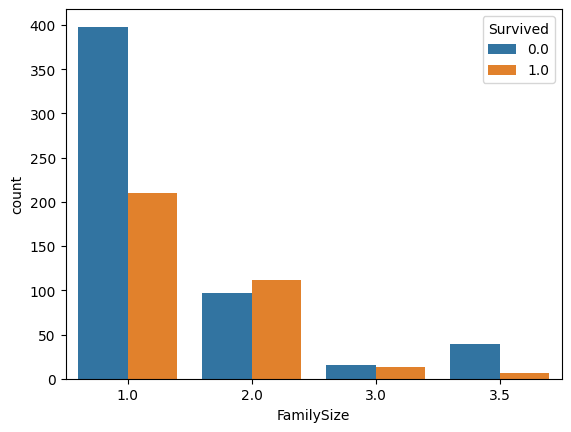

In [199]:
sns.countplot(x = 'FamilySize', hue = 'Survived', data = combined_df)

<li>We have seen this before Passengers travelling alone have high survival rate and passengers travelling with family size between(2-4) have even higher survival rate than passengers travelling alone, but if you have familysize (<=5) your survival rate decreases as family size increases

<Axes: xlabel='FamilySize', ylabel='Fare'>

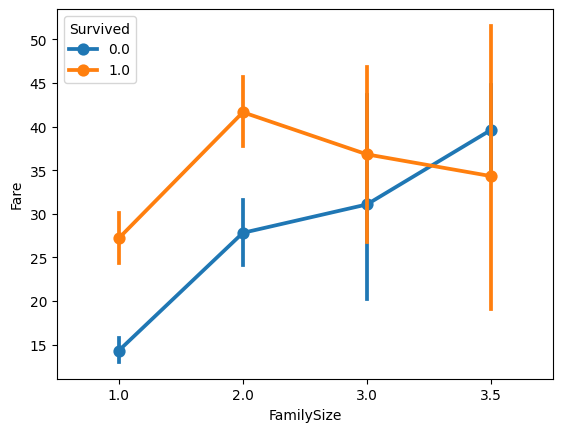

In [200]:
sns.pointplot(x='FamilySize', y='Fare', hue='Survived', data=combined_df)

<li>It can be observed that passengers who paid a higher fare were more likely to survive, regardless of whether they were traveling alone or with a family size of 5 or 6

### 2.2.4 Fare
Calculating the individual fare

In [201]:
combined_df['fare'] = combined_df['Fare']/(combined_df['FamilySize'])

In [202]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train,Deck,Title,FamilySize,IsAlone,fare
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,M,S,1.0,M,Mr,2.0,0,3.6250
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,66.3438,C85,C,1.0,ABC,Mrs,2.0,0,33.1719
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,M,S,1.0,M,Miss,1.0,1,7.9250
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S,1.0,ABC,Mrs,2.0,0,26.5500
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,M,S,1.0,M,Mr,1.0,1,8.0500


## 2.2 Feature Transformation
###  Fare
Fare distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled. So transforming it using Yeo-Johnson Transformer

Text(0.5, 1.0, 'Q-Q Plot for fare')

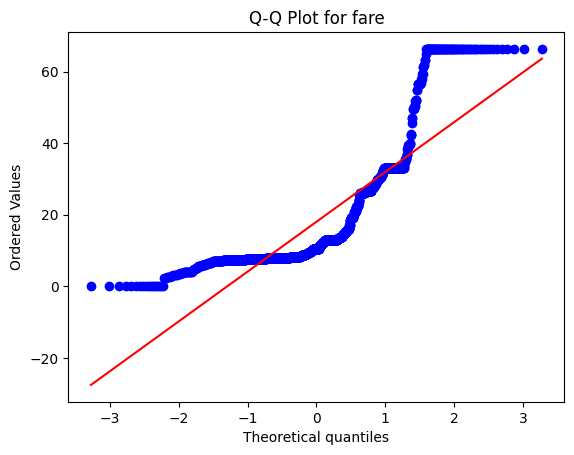

In [204]:
probplot(combined_df['fare'].values.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for fare')

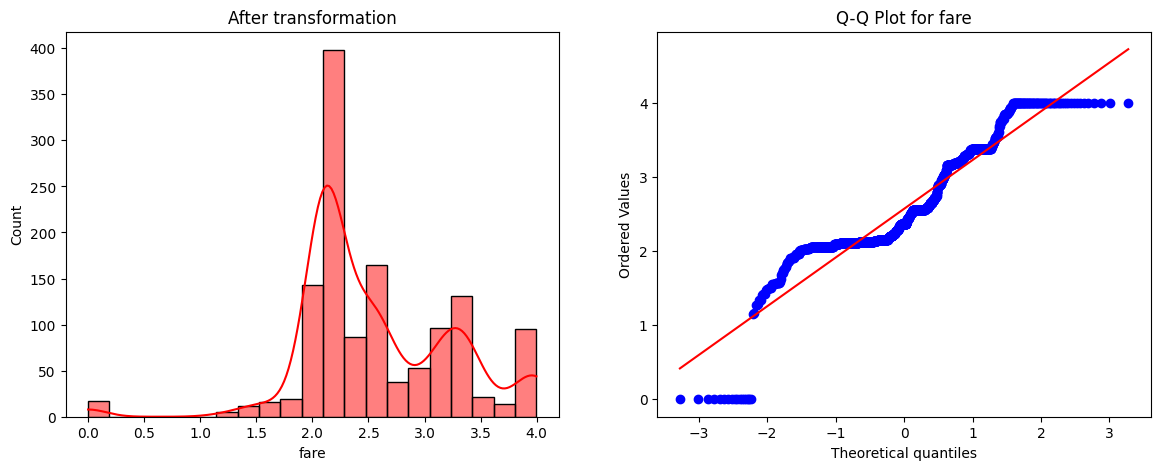

In [205]:
# Reshape fare values for PowerTransformer
fare_values = combined_df['fare'].values.reshape(-1, 1)

# Initialize PowerTransformer
yt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit transformer to your data and transform it
fare_transformed = yt.fit_transform(fare_values)

# Replace the original data with transformed values
combined_df['fare'] = fare_transformed

# Plotting
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(combined_df['fare'], kde=True, color='red')
plt.title('After transformation')

plt.subplot(1, 2, 2)
probplot(combined_df['fare'].values.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot for fare')

plt.show()

Skewness is clearly reduced after yeo-johnson transformation
<li>Reshape fare values for PowerTransformer: We reshape the 'Individual_fare' values into a 2D array with one column and multiple rows, as the PowerTransformer expects a 2D array input.
<li>Initialize PowerTransformer: We initialize a PowerTransformer object with the desired transformation method, which in this case is 'yeo-johnson'. We set standardize=False to only perform the transformation without standardizing the data.
<li>Fit transformer to your data and transform it: We fit the PowerTransformer to the data and then transform the 'Individual_fare' values using the fit_transform() method. This step applies the transformation to the data.
<li>Replace the original data with transformed values: We replace the original 'Individual_fare' values in the DataFrame with the transformed values. This step updates the DataFrame with the transformed data.

## 2.2.1 Binning Continuous Features

### Age

In [206]:
age_labels = ['0-10', '11-21', '21-30', '31-40', '41-50', '51-65']
age_bins = [0, 10, 21, 30, 40, 50, 65]
combined_df['age'] = pd.cut(combined_df['Age'], bins=age_bins, right=False, labels=age_labels)

<Axes: xlabel='age', ylabel='count'>

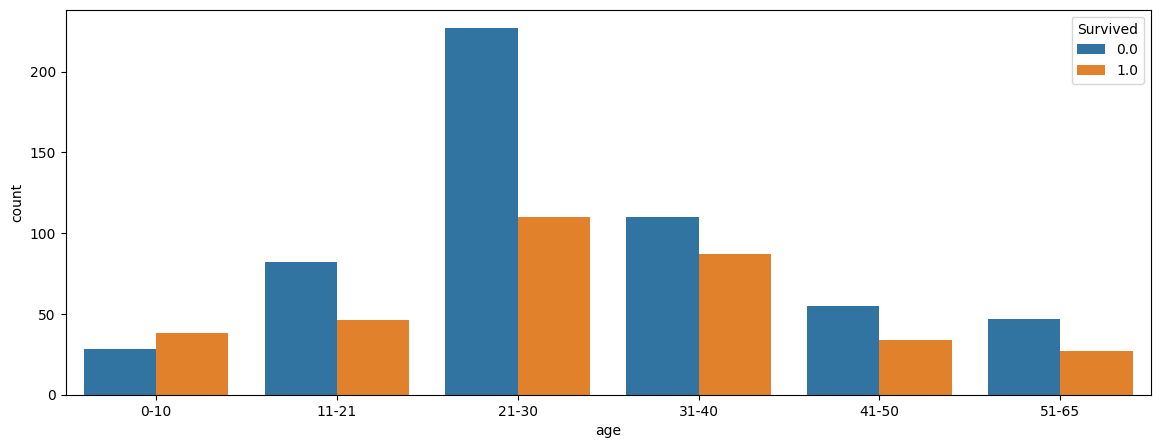

In [207]:
plt.figure(figsize = (14,5))
sns.countplot(x='age', hue = 'Survived', data = combined_df)

<li>The 'Age' feature exhibits a near to normal distribution with some spikes and bumps. Using 8 quantile-based bins for age segmentation, we observe that the first bin corresponds to the youngest age group and exhibits high survival rate. <li>Conversely, the (11, 21) bin,shows the lowest survival rate, indicating a notable drop in survival probability. <li>Interestingly, there is an anomalous age group (21 to 40) exhibiting both a high survival rate and a high non-survival rate. This segment encompasses areas with both high survival and non-survival rates, which is captured in this segmentation process

In [208]:
combined_df['age'].value_counts().sort_index()

age
0-10      86
11-21    181
21-30    526
31-40    271
41-50    135
51-65    110
Name: count, dtype: int64

In [209]:
# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first', dtype=np.int64, sparse_output=False)

# Fit and transform the selected columns
encoded_columns1 = ohe.fit_transform(combined_df[['age']])

# Convert encoded_columns to a DataFrame
encoded_df1 = pd.DataFrame(encoded_columns1, columns=ohe.get_feature_names_out(['age']))

# Concatenate encoded_df with combined_df along the second axis
combined_df = pd.concat([combined_df,encoded_df1], axis=1)

### Fare

In [210]:
fare_labels = ['0-0.5', '0.6-1.1', '1.2-1.7', '1.8-2.3', '2.4-2.9', '3.0-3.6']
fare_bins = [0, 0.5, 1.1, 1.7, 2.3, 2.9, 3.6]

combined_df['fare'] = pd.cut(combined_df.fare, bins=fare_bins, right=False, labels=fare_labels)

<Axes: xlabel='fare', ylabel='count'>

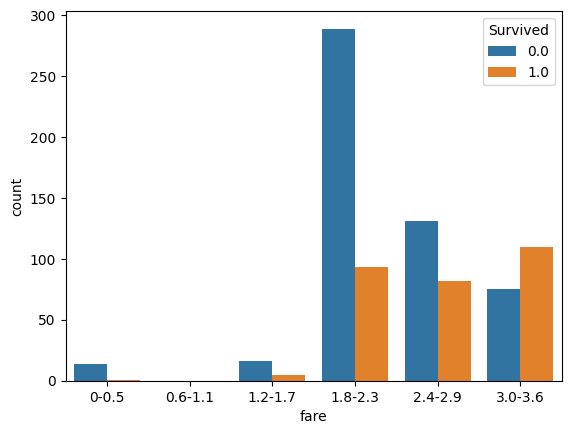

In [211]:
sns.countplot(x='fare', hue = 'Survived', data = combined_df)

In [212]:
combined_df['fare'].value_counts().sort_index()

fare
0-0.5       17
0.6-1.1      0
1.2-1.7     31
1.8-2.3    564
2.4-2.9    307
3.0-3.6    280
Name: count, dtype: int64

<li>The 'Fare' feature exhibits a near to normal distribution, we observe that the survival rate is exceptionally high towards the right end of the fare distribution. By segmenting the fare data into 6 quantile-based bins. 
<li>Notably, groups at the lower end of the fare spectrum exhibit the lowest survival rates, while those at the higher end demonstrate the highest survival rates. 
<li>This reaffirms our previous observation that passengers who paid higher fares tended to have higher survival rates. <li>Furthermore, an intriguing anomaly is observed in the middle range of fares (1.8, 2.3), where a group with a surprisingly exhibiting both a high survival rate and a high non-survival rate.

In [213]:
# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first', dtype=np.int64, sparse_output=False)

# Fit and transform the selected columns
encoded_columns2 = ohe.fit_transform(combined_df[['fare']])

# Convert encoded_columns to a DataFrame
encoded_df2 = pd.DataFrame(encoded_columns2, columns=ohe.get_feature_names_out(['fare']))

# Concatenate encoded_df with combined_df along the second axis
combined_df = pd.concat([combined_df,encoded_df2], axis=1)

## 2.2.2 Encoding categorical features
### FamilySize

<li>Family Size with 1 are labeled as Alone
<li>Family Size with 2, 3 and 4 are labeled as Small
<li>Family Size with 5 and 6 and 7are labeled as Medium
<li>Family Size with 8 and 11 are labeled as Large

In [214]:
combined_df['Single'] = combined_df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined_df['SmallF'] = combined_df['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
combined_df['MediumF'] = combined_df['FamilySize'].map(lambda s: 1 if 5 <= s <= 7 else 0)
combined_df['LargeF'] = combined_df['FamilySize'].map(lambda s: 1 if s >= 8 else 0)

### Embarked, Sex, Title

In [215]:
combined_df.loc[combined_df['Title']=='Mrs', 'IsMarried'] = 1
combined_df['IsMarried'].fillna(0, inplace=True)
combined_df['IsMarried'] = combined_df['IsMarried'].astype(int)

In [216]:
# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first', dtype=np.int64, sparse_output=False)

# Fit and transform the selected columns
encoded_columns = ohe.fit_transform(combined_df[['Sex', 'Embarked', 'Title']])

# Convert encoded_columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(['Sex', 'Embarked', 'Title']))

# Concatenate encoded_df with combined_df along the second axis
combined_df = pd.concat([combined_df,encoded_df], axis=1)


### Deck

In [217]:
deck_mapping = {'ABC': 1,'DE': 2,'FG': 3,'M': 4}

# Map the categories to numerical values
combined_df['Deck'] = combined_df['Deck'].map(deck_mapping)

In [218]:
combined_df['Deck'].value_counts()

Deck
4    1014
1     182
2      87
3      26
Name: count, dtype: int64

In [219]:
combined_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_train', 'Deck',
       'Title', 'FamilySize', 'IsAlone', 'fare', 'age', 'age_11-21',
       'age_21-30', 'age_31-40', 'age_41-50', 'age_51-65', 'fare_1.2-1.7',
       'fare_1.8-2.3', 'fare_2.4-2.9', 'fare_3.0-3.6', 'fare_nan', 'Single',
       'SmallF', 'MediumF', 'LargeF', 'IsMarried', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [220]:
combined_df = combined_df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'FamilySize', 'IsAlone', 'fare', 'age'], axis = 1)

In [221]:
combined_df.columns

Index(['Survived', 'is_train', 'Deck', 'age_11-21', 'age_21-30', 'age_31-40',
       'age_41-50', 'age_51-65', 'fare_1.2-1.7', 'fare_1.8-2.3',
       'fare_2.4-2.9', 'fare_3.0-3.6', 'fare_nan', 'Single', 'SmallF',
       'MediumF', 'LargeF', 'IsMarried', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [222]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   is_train      1309 non-null   float64
 2   Deck          1309 non-null   int64  
 3   age_11-21     1309 non-null   int64  
 4   age_21-30     1309 non-null   int64  
 5   age_31-40     1309 non-null   int64  
 6   age_41-50     1309 non-null   int64  
 7   age_51-65     1309 non-null   int64  
 8   fare_1.2-1.7  1309 non-null   int64  
 9   fare_1.8-2.3  1309 non-null   int64  
 10  fare_2.4-2.9  1309 non-null   int64  
 11  fare_3.0-3.6  1309 non-null   int64  
 12  fare_nan      1309 non-null   int64  
 13  Single        1309 non-null   int64  
 14  SmallF        1309 non-null   int64  
 15  MediumF       1309 non-null   int64  
 16  LargeF        1309 non-null   int64  
 17  IsMarried     1309 non-null   int32  
 18  Sex_male      1309 non-null 

In [223]:
combined_df.sample(5)

,Survived,is_train,Deck,age_11-21,age_21-30,age_31-40,age_41-50,age_51-65,fare_1.2-1.7,fare_1.8-2.3,...,MediumF,LargeF,IsMarried,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
45,0.0,1.0,4,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
719,0.0,1.0,4,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
695,0.0,1.0,4,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1230,NaN,0.0,4,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1225,NaN,0.0,4,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


# 3. Model, predict and solve
Now we are ready to train a model and predict the required solution

In [224]:
train_df = combined_df[combined_df['is_train'] == 1].drop(columns=['is_train'])
test_df = combined_df[combined_df['is_train'] == 0].drop(columns=['is_train', 'Survived'])

# Confirm the shapes
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (891, 24)
Test shape: (418, 23)


In [225]:
X_train = train_df.drop(columns='Survived')
y_train = train_df['Survived']
X_test = test_df

In [226]:
X_train.shape, y_train.shape, X_test.shape

((891, 23), (891,), (418, 23))

## LogisticRegression

In [227]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

# Make predictions on the training data to evaluate the model
y_pred = lgr.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
#conf_matrix = confusion_matrix(y_train, y_train_pred)
#class_report = classification_report(y_train, y_train_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
#print('Confusion Matrix:')
#print(conf_matrix)
#print('Classification Report:')
#print(class_report)
y_pred = lgr.predict(X_test)

Accuracy: 0.819304152637486


## KNeighbors

In [228]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')
y_pred = knn.predict(X_test)

Accuracy: 0.8507295173961841


## DecisionTree

In [229]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')
y_pred = dt.predict(X_test)

Accuracy: 0.8843995510662177


## RandomForest

In [230]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')
y_pred = rf.predict(X_test)

Accuracy: 0.8843995510662177


<li>While both Decision Tree and Random Forest score the same, we choose to use Random Forest

In [231]:
predictions = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
predictions.to_csv('predictions.csv', index=False)